In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
asset = pd.read_csv('asset_details.csv')
sup = pd.read_csv('supplemental_train.csv')

In [3]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [4]:
asset

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [5]:
# check length in assets
for i in asset['Asset_ID']:
    print(i)
    print('length:', len(df[df['Asset_ID'] == i]))
    print()

2
length: 1953537

0
length: 1942619

1
length: 1956282

5
length: 1955140

7
length: 1951127

6
length: 1956200

9
length: 1956030

11
length: 1701261

13
length: 1874560

12
length: 1778749

3
length: 1791867

8
length: 1592071

10
length: 670497

4
length: 1156866



In [36]:
# work with btc first
btc = df[df['Asset_ID'] == 1]

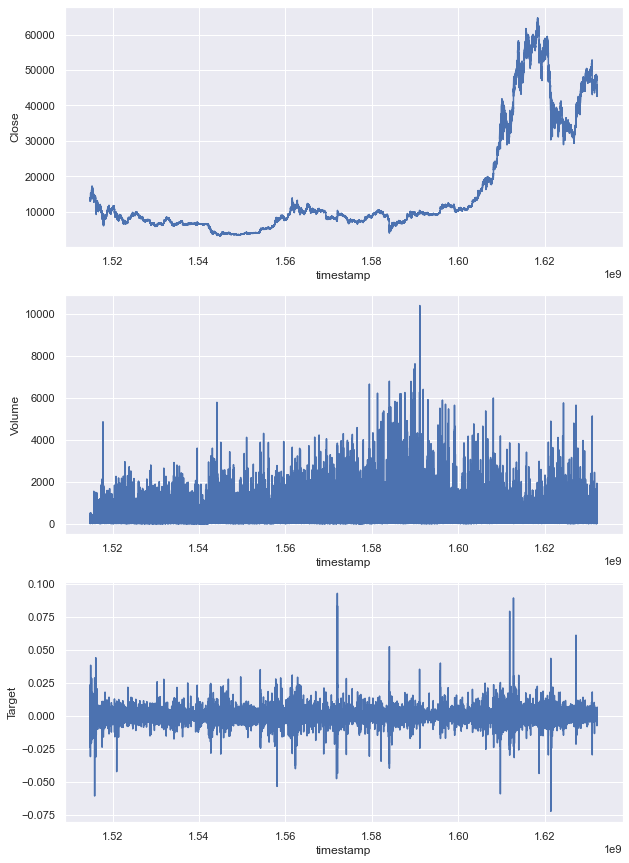

In [31]:
# general graphs show trend of btc
fig, axss = plt.subplots(3, figsize=[10, 15])
sns.set_theme(style="darkgrid")
fig1 = sns.lineplot(x='timestamp', y='Close', data=btc, ax=axss[0])
fig2 = sns.lineplot(x='timestamp', y='Volume', data=btc, ax=axss[1])
fig3 = sns.lineplot(x='timestamp', y='Target', data=btc, ax=axss[2])

In [37]:
# inspect data
btc = btc.set_index('timestamp')
btc.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956282 non-null  int64  
 1   Count     1956282 non-null  float64
 2   Open      1956282 non-null  float64
 3   High      1956282 non-null  float64
 4   Low       1956282 non-null  float64
 5   Close     1956282 non-null  float64
 6   Volume    1956282 non-null  float64
 7   VWAP      1956282 non-null  float64
 8   Target    1955978 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.3 MB


In [8]:
# identify missing values
btc.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [9]:
# check begin date and end date of data
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')

print('BTC data goes from ', beg_btc, 'to ', end_btc)

BTC data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [10]:
# found out that the gap between should be in one minute
btc.index[1].astype('datetime64[s]')

numpy.datetime64('2018-01-01T00:02:00')

In [11]:
# check missing values
(btc.index[1:] - btc.index[:-1]).value_counts().head()

60     1956136
120         78
180         12
240         11
420          9
Name: timestamp, dtype: int64

In [38]:
# fill all missing values with the nearest
timeframe = range(btc.index[0], btc.index[-1]+60, 60)
btc = btc.reindex(timeframe, method='nearest')

In [13]:
# check if still has missing values (gap greater than 60 seconds)
(btc.index[1:] - btc.index[:-1]).value_counts().head()

60    1956958
Name: timestamp, dtype: int64

In [39]:
# show nan rows
btc[btc.isna().any(axis=1)]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1571201700,1,15.0,8164.253333,8169.970000,8163.92,8165.283333,0.473769,8165.547106,NaN
1571201820,1,9.0,8167.122500,8169.770000,8165.01,8166.142500,0.622516,8167.036652,NaN
1571201940,1,22.0,8164.242500,8165.080000,8162.90,8163.950000,0.671666,8164.156317,NaN
1571202000,1,6.0,8164.370000,8166.000000,8159.41,8161.535000,0.593204,8164.801750,NaN
1571202060,1,6.0,8165.580000,8165.810000,8165.26,8165.260000,0.218742,8165.510211,NaN
...,...,...,...,...,...,...,...,...,...
1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


In [25]:
btc.loc[[1571201640-60, 1571201640, 1571201700]]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1571201580,1,6.0,8167.000000,8167.00,8164.90,8165.000000,0.651758,8166.236875,0.000743
1571201640,1,2.0,8167.030000,8167.03,8167.02,8167.020000,0.250247,8167.029766,0.000574
1571201700,1,15.0,8164.253333,8169.97,8163.92,8165.283333,0.473769,8165.547106,NaN


In [40]:
# use forward fill to fill nas
btc['Target'] = btc['Target'].fillna(method='pad')

In [41]:
# check correctness
btc[btc.isna().any(axis=1)]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,


In [42]:
btc.tail(16)

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1632181500,1,2177.0,42655.528484,42715.990000,42630.17,42678.721429,93.523647,42679.036829,0.002726
1632181560,1,2352.0,42688.935000,42810.260000,42662.27,42778.291250,97.442472,42739.891567,0.002726
1632181620,1,2080.0,42790.287143,42828.000000,42742.36,42790.175714,97.634234,42794.666167,0.002726
1632181680,1,2058.0,42792.855714,42827.700000,42713.48,42731.731429,78.468814,42786.068940,0.002726
1632181740,1,3717.0,42745.153750,42937.310000,42713.48,42898.565000,116.567006,42828.789861,0.002726
1632181800,1,3253.0,42896.174286,42966.980000,42852.07,42939.645714,113.220529,42910.257438,0.002726
1632181860,1,2264.0,42937.784286,42971.950000,42899.10,42927.167143,56.655507,42932.332787,0.002726
1632181920,1,2824.0,42933.254907,43014.980000,42907.18,42979.833750,97.404745,42963.462903,0.002726
1632181980,1,1697.0,42974.108693,43005.650000,42929.74,42960.601429,58.419459,42963.080444,0.002726


In [132]:
# 15 rows in the end has NaN in target
# remove those 15 rows
btc.drop(btc.tail(15).index, axis=0, inplace=True)